<a href="https://colab.research.google.com/github/khadijaatiq/ML-Algos/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


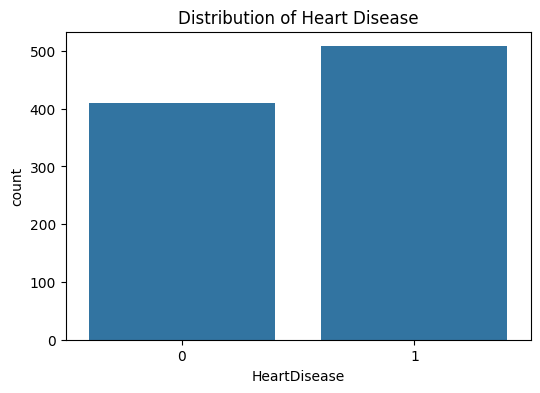

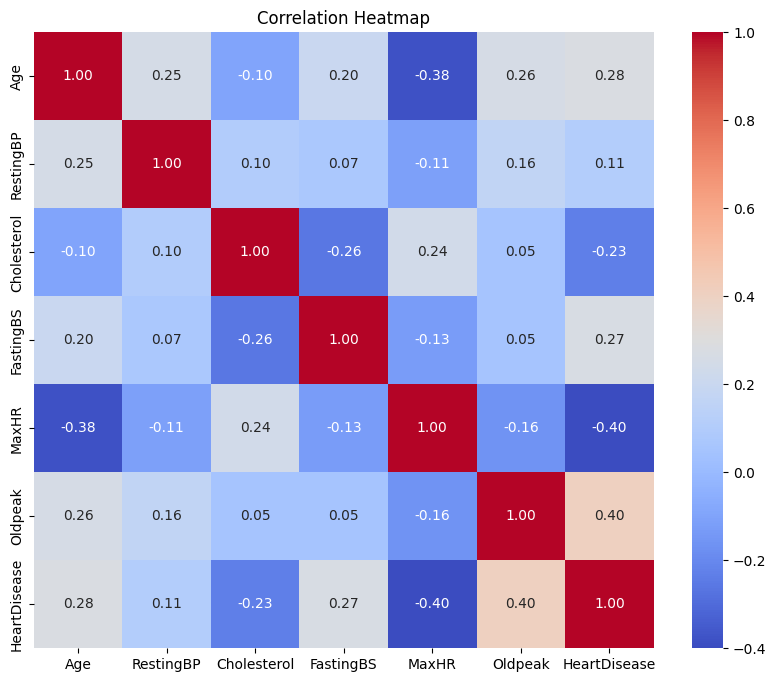

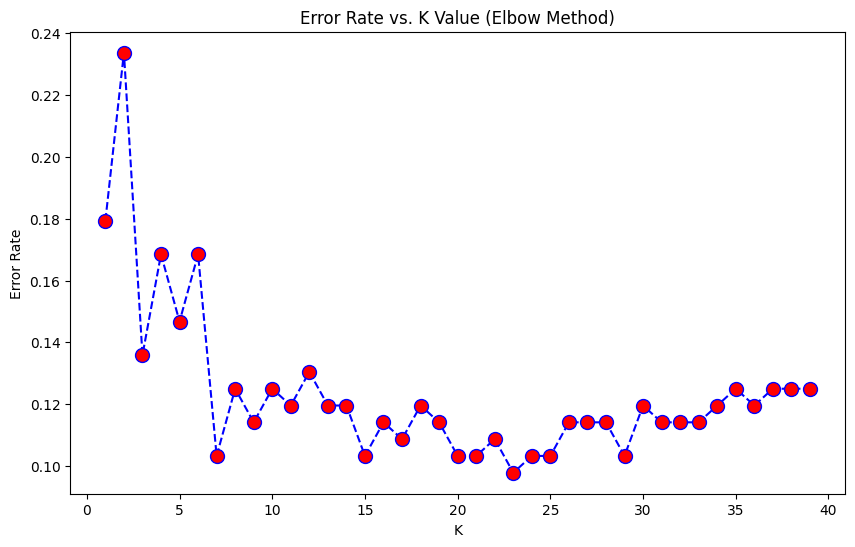


Results for K=23:
------------------------------
Confusion Matrix:
[[70  7]
 [11 96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        77
           1       0.93      0.90      0.91       107

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Accuracy Score: 0.9022


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ==========================================
# 1. Load the Dataset
# ==========================================
# Reads the CSV file into a pandas DataFrame
df = pd.read_csv('heart.csv')

# Show basic info to check for nulls and data types
print("Dataset Info:")
print(df.info())

# ==========================================
# 2. Exploratory Data Analysis (EDA)
# ==========================================
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

# Visualize correlation (only numeric columns) to see relationships
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# ==========================================
# 3. Data Preprocessing
# ==========================================
# ONE-HOT ENCODING: Convert text categories (like 'M', 'F') into numbers (0, 1)
# drop_first=True is used to prevent multicollinearity (Dummy Variable Trap)
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate Features (X) and Target (y)
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# TRAIN-TEST SPLIT: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALING: Crucial for KNN. Normalizes data so distance calculations are fair.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================================
# 4. Finding Optimal K (Elbow Method)
# ==========================================
error_rate = []

# Loop through K values from 1 to 40 to see which gives the lowest error
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # Calculate error: mean of predictions that did not match y_test
    error_rate.append(np.mean(pred_i != y_test))

# Plot the Error Rate vs K Value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value (Elbow Method)')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# ==========================================
# 5. Final Model Training & Evaluation
# ==========================================
# From the graph, we chose K=23 (lowest error point)
k_value = 23
knn = KNeighborsClassifier(n_neighbors=k_value)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Print Results
print(f"\nResults for K={k_value}:")
print("-" * 30)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")